# MMA 867 - Individual Assignment
## Kaggle Competition - House Prices - Advanced Regression Techniques
### By Gopala Goyal - 20254605

>As a part of this assignment, we would be performing predictive analysis on Housing price data from Kaggle and estimating the prices of houses in Iowa and other parts of the US where is the data is based on.

> The flow of the assignment would be
>1. Collecting, gathering and importing data
>2. Performing Exploratory Data Analysis (EDA) where we see what the data is and how it is structured, and check for any discrepancies in the data
>3. Data Wrangling Process - Clean, structure and prepare data for predictive analysis
>4. Developing regression model to predict housing prices for test data
>5. Reporting outcomes

In [31]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm
%matplotlib inline

In [4]:
hp_train_df = pd.read_csv("train.csv")
hp_test_df = pd.read_csv("test.csv")
hp_train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
hp_train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
hp_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
#Backup DataFrame
hp_tr = hp_train_df
hp_te=hp_test_df

##### We would use hp_tr as training data and hp_te as test data for this project
### Data exploration

/Users/apple/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


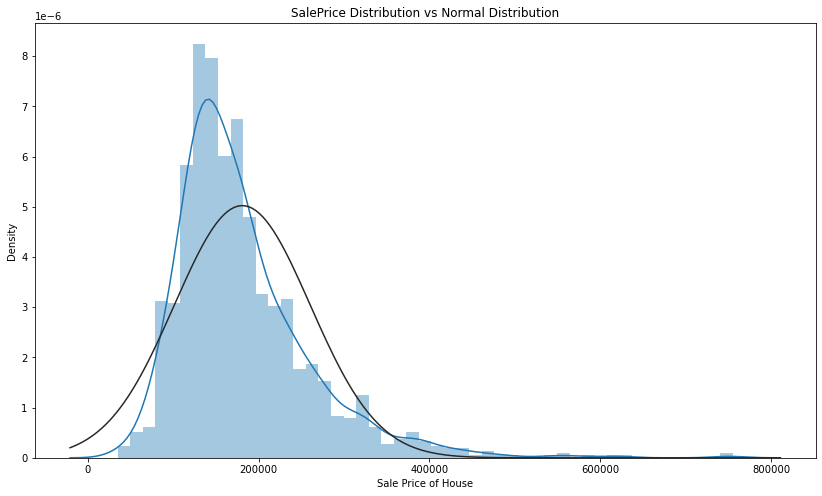

In [35]:
plt.figure(figsize = (14,8))
sns.distplot(hp_tr['SalePrice'], kde= True, hist=True, fit = norm)
plt.xlabel('Sale Price of House')
plt.title('SalePrice Distribution vs Normal Distribution')
plt.show()

<AxesSubplot:>

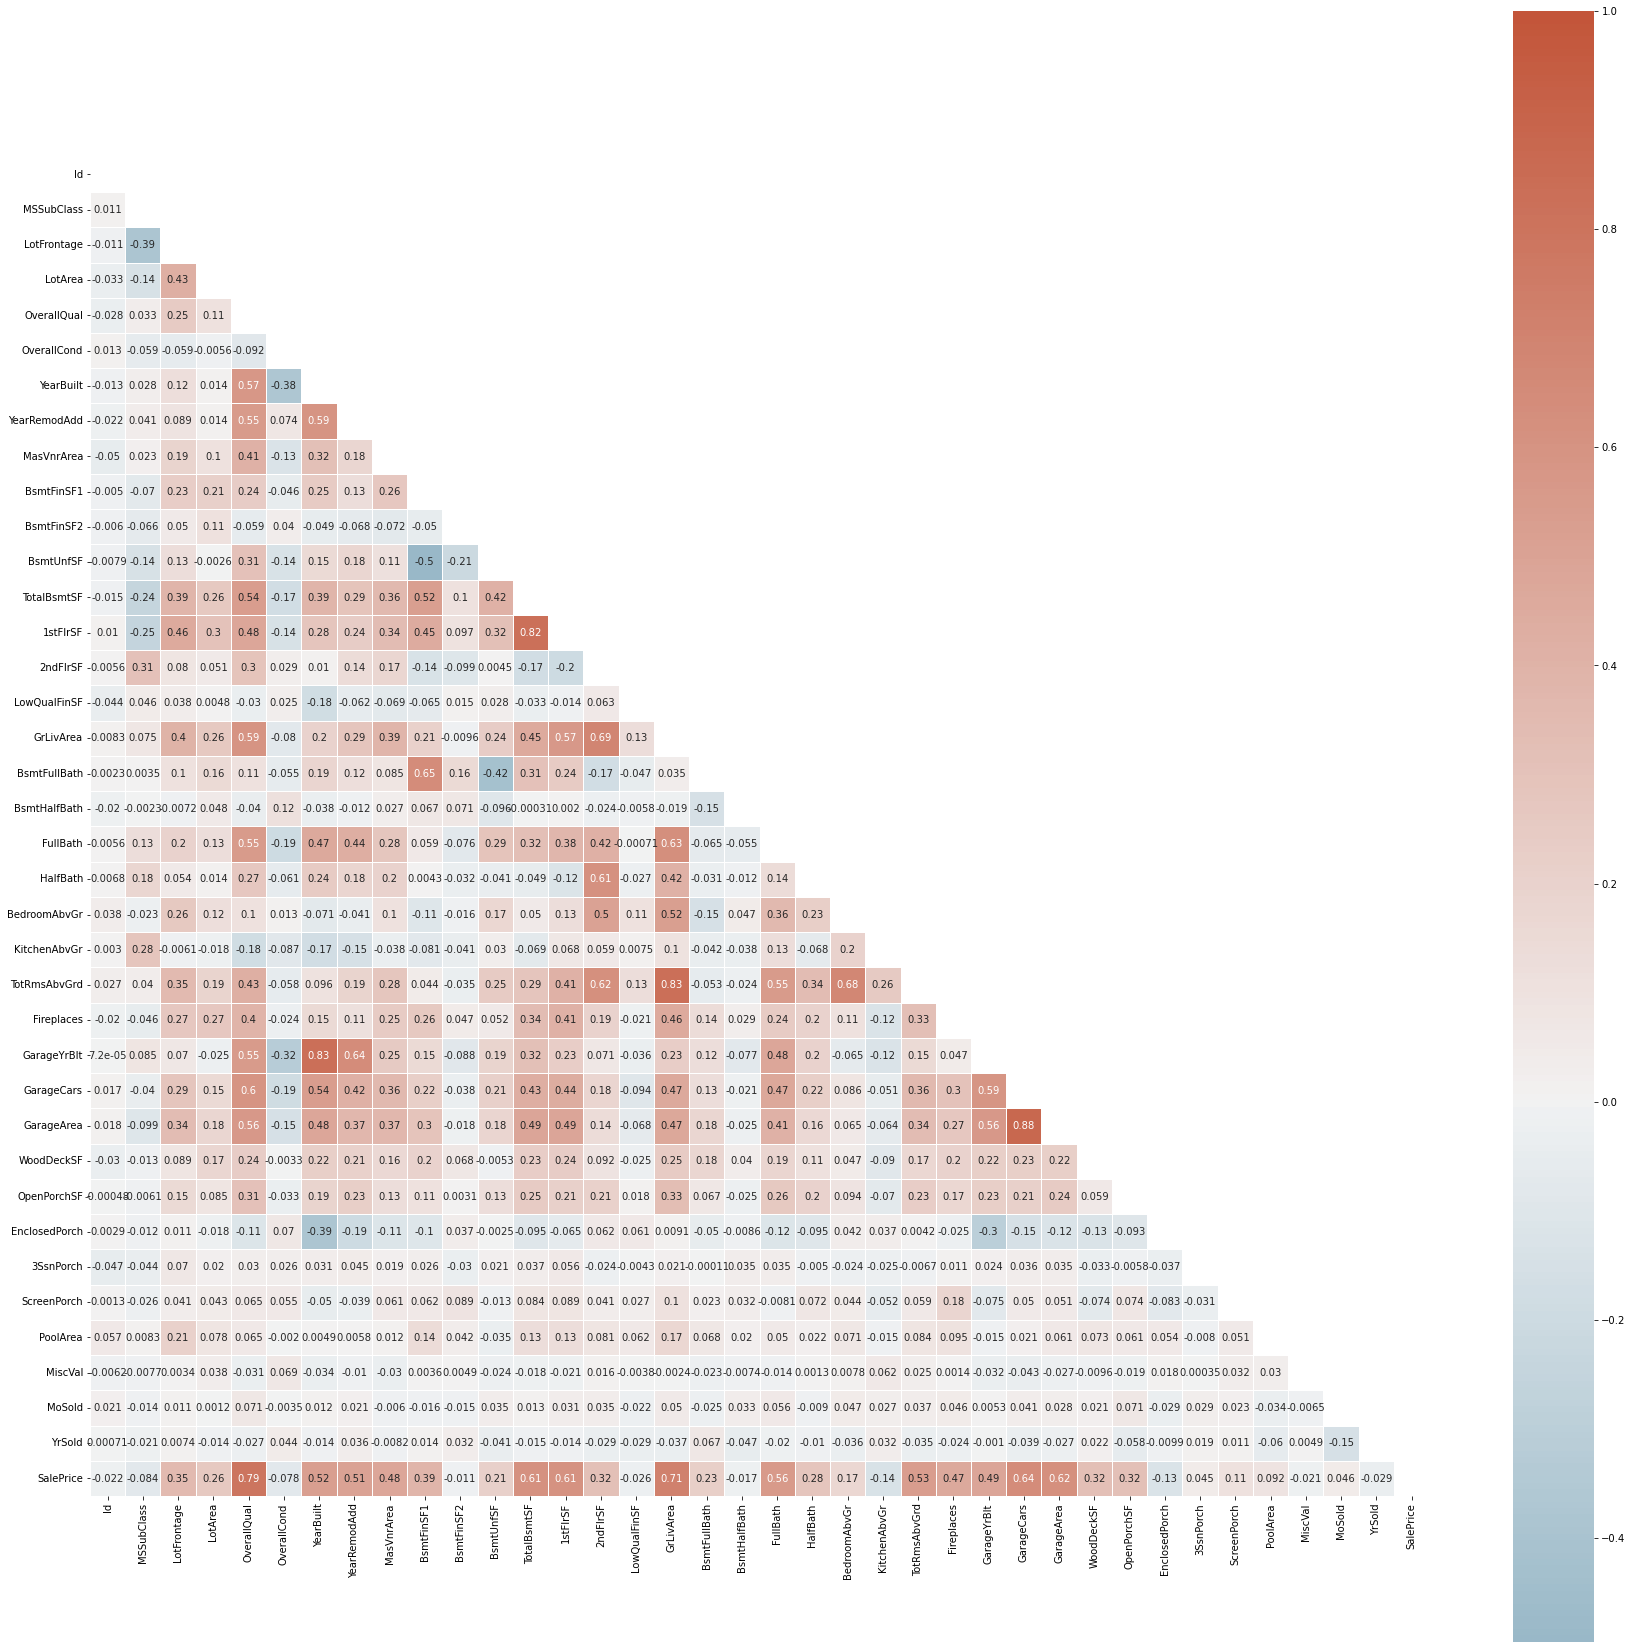

In [50]:
#Create a correlation matrix to see the correlation between independent variables and SalePrice
plt.figure(figsize = (30,30))
corr_matrix = hp_tr.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix,mask=mask, cmap=cmap, vmax=1, center=0, annot = True,
            square=True, linewidths=.5)

In [61]:
signif_list = corr_matrix[corr_matrix['SalePrice']>0.5].all(axis = 1)
signif_list

OverallQual     True
YearBuilt       True
YearRemodAdd    True
TotalBsmtSF     True
1stFlrSF        True
GrLivArea       True
FullBath        True
TotRmsAbvGrd    True
GarageCars      True
GarageArea      True
SalePrice       True
dtype: bool

#### Since we have the list of variables that are highly correlated (>0.5) to the SalePrice target variable, we now explore more on their relation to the SalePrice

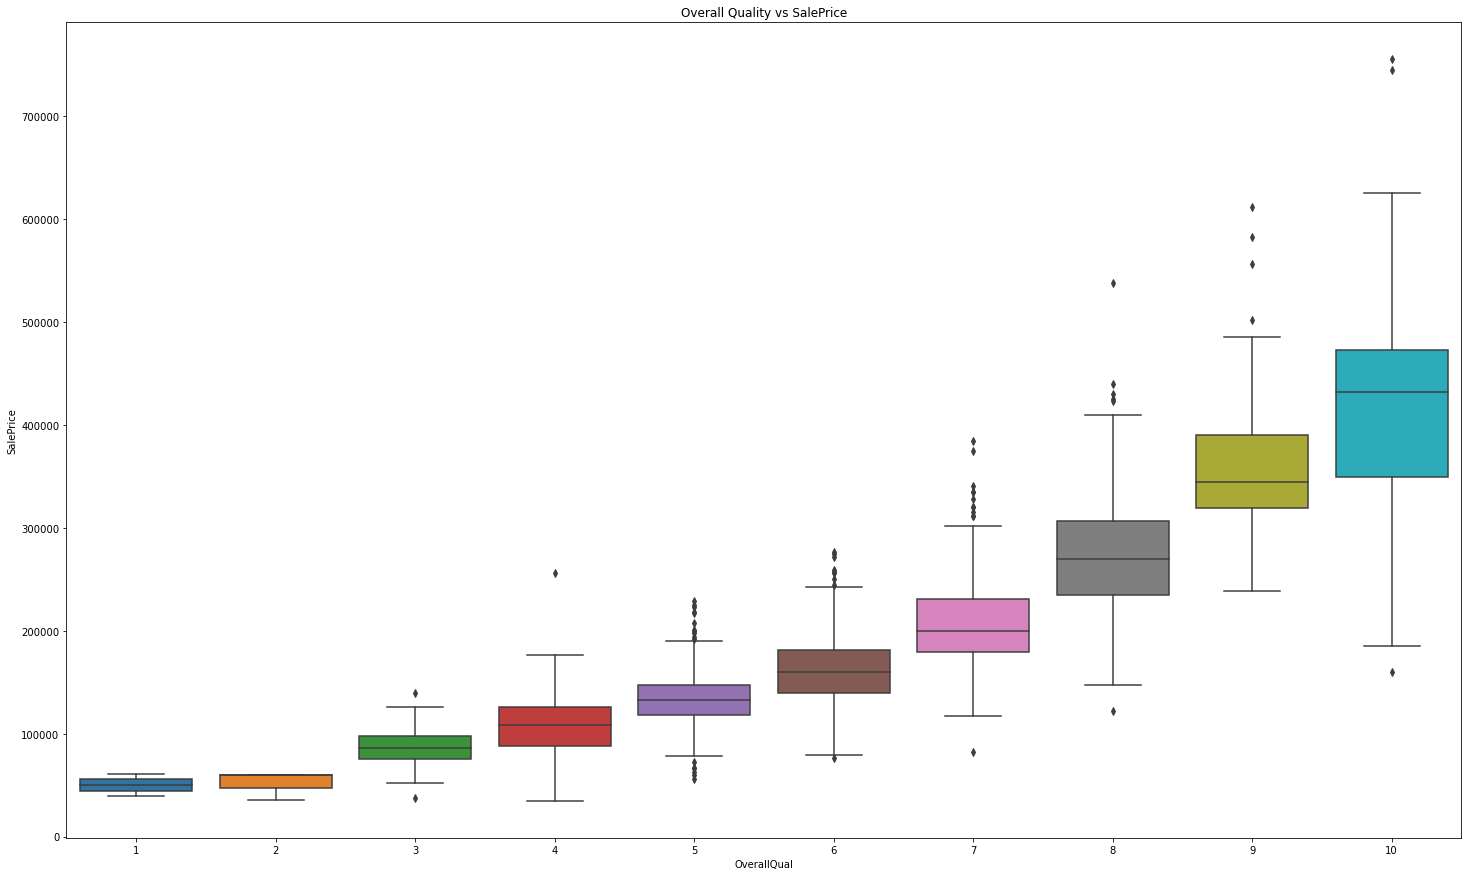

In [75]:
#OverallQuality vs SalePrice
#Since the variable tells the range from which the SalePrice varies on the basis of the Quality of the house
plt.figure(figsize = (25,15))
sns.boxplot(data = hp_tr, x="OverallQual", y = "SalePrice")
plt.title("Overall Quality vs SalePrice")
plt.show()

In [74]:
hp_tr.YearBuilt.describe()

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
25%      1954.000000
50%      1973.000000
75%      2000.000000
max      2010.000000
Name: YearBuilt, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

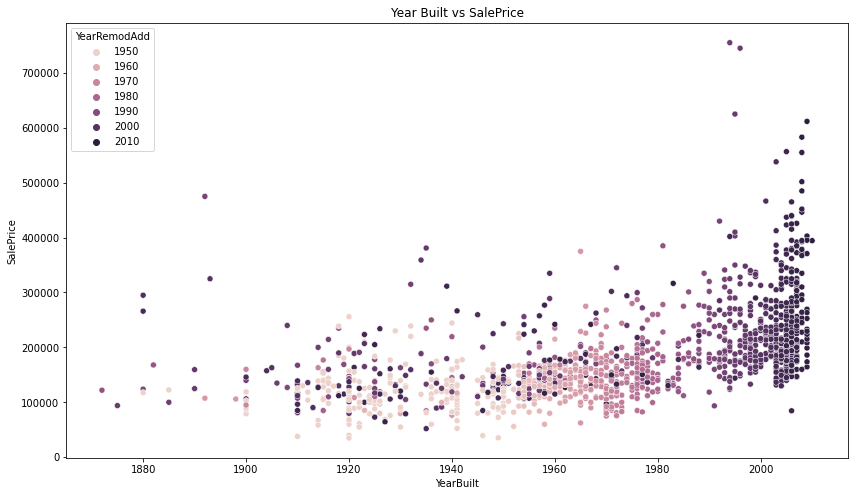

In [87]:
#Year Built and Year Re Modified have similar kind of a correlation hence would add a hue for YearRemodAdd
plt.figure(figsize = (14,8))
sns.scatterplot(x="YearBuilt", y="SalePrice",hue = "YearRemodAdd", data=hp_tr)
plt.title("Year Built vs SalePrice")
plt.show

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
25%      1967.000000
50%      1994.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64